In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Lectura de la data

In [4]:
df =pd.read_csv('data_project/KAG_conversion_data.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')
(1143, 11)


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


Informacion de la data y exploracion

In [5]:
df.columns = df.columns.str.upper()
df.columns

Index(['AD_ID', 'XYZ_CAMPAIGN_ID', 'FB_CAMPAIGN_ID', 'AGE', 'GENDER',
       'INTEREST', 'IMPRESSIONS', 'CLICKS', 'SPENT', 'TOTAL_CONVERSION',
       'APPROVED_CONVERSION'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AD_ID                1143 non-null   int64  
 1   XYZ_CAMPAIGN_ID      1143 non-null   int64  
 2   FB_CAMPAIGN_ID       1143 non-null   int64  
 3   AGE                  1143 non-null   object 
 4   GENDER               1143 non-null   object 
 5   INTEREST             1143 non-null   int64  
 6   IMPRESSIONS          1143 non-null   int64  
 7   CLICKS               1143 non-null   int64  
 8   SPENT                1143 non-null   float64
 9   TOTAL_CONVERSION     1143 non-null   int64  
 10  APPROVED_CONVERSION  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [8]:
for i in df.columns:
    if df[i].nunique()<10:
        print(f'The columns "{i}" is__{df[i].dtype}__\nhas __{df[i].nunique()}__unique values:\n{df[i].value_counts()}')
        print(10*'==')
    else:
        print(f'the columns"{i}" is __{df[i].dtype}__n has __{df[i].nunique()}__unique values')
        print(10*"==")

the columns"AD_ID" is __int64__n has __1143__unique values
The columns "XYZ_CAMPAIGN_ID" is__int64__
has __3__unique values:
1178    625
936     464
916      54
Name: XYZ_CAMPAIGN_ID, dtype: int64
the columns"FB_CAMPAIGN_ID" is __int64__n has __691__unique values
The columns "AGE" is__object__
has __4__unique values:
30-34    426
45-49    259
35-39    248
40-44    210
Name: AGE, dtype: int64
The columns "GENDER" is__object__
has __2__unique values:
M    592
F    551
Name: GENDER, dtype: int64
the columns"INTEREST" is __int64__n has __40__unique values
the columns"IMPRESSIONS" is __int64__n has __1130__unique values
the columns"CLICKS" is __int64__n has __183__unique values
the columns"SPENT" is __float64__n has __869__unique values
the columns"TOTAL_CONVERSION" is __int64__n has __32__unique values
the columns"APPROVED_CONVERSION" is __int64__n has __16__unique values


In [9]:
df.describe()

,AD_ID,XYZ_CAMPAIGN_ID,FB_CAMPAIGN_ID,INTEREST,IMPRESSIONS,CLICKS,SPENT,TOTAL_CONVERSION,APPROVED_CONVERSION
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [12]:
print('Total ADS:{}'.format(df.shape[0]))
print('NUmber of ADS with 0 clicks:{}'.format(len(df.loc[df['CLICKS'] ==0])))
print('Number of 0 paids to FACEBOOK for show ing ADS:{}'.format(len(df.loc[df['SPENT']==0])))
print('Numbers of ADS with 0 ENQUIRES ABOUT THEIR PRODUCT:{}'.format(len(df.loc[df['TOTAL_CONVERSION']==0])))
print('Number of ADS with o buys:{}'.format(len(df.loc[df['APPROVED_CONVERSION']==0])))


Total ADS:1143
NUmber of ADS with 0 clicks:207
Number of 0 paids to FACEBOOK for show ing ADS:207
Numbers of ADS with 0 ENQUIRES ABOUT THEIR PRODUCT:8
Number of ADS with o buys:559


In [13]:
df.var()

AD_ID                  3.763321e+10
XYZ_CAMPAIGN_ID        1.479371e+04
FB_CAMPAIGN_ID         4.202627e+08
INTEREST               7.264174e+02
IMPRESSIONS            9.782018e+10
CLICKS                 3.236750e+03
SPENT                  7.553073e+03
TOTAL_CONVERSION       2.010261e+01
APPROVED_CONVERSION    3.019629e+00
dtype: float64

In [14]:
df_c = df.copy()
df_c.head()

,AD_ID,XYZ_CAMPAIGN_ID,FB_CAMPAIGN_ID,AGE,GENDER,INTEREST,IMPRESSIONS,CLICKS,SPENT,TOTAL_CONVERSION,APPROVED_CONVERSION
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [15]:
categories =['AD_ID','FB_CAMPAIGN_ID','AGE','GENDER','XYZ_CAMPAIGN_ID','INTEREST']
df_c[categories]= df_c[categories].astype('category')

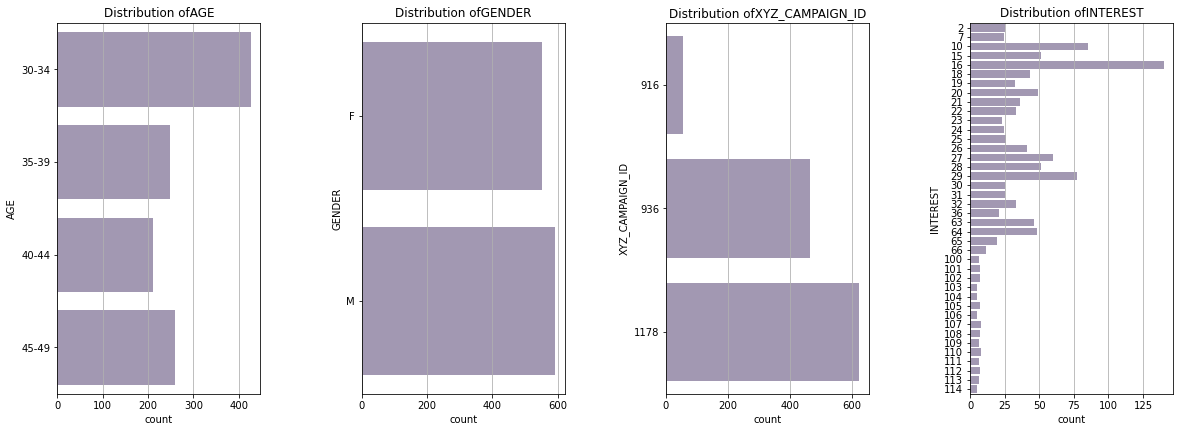

In [18]:
#Dsitribucion de las variables categoricas
x=0
fig =plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace =0.5)
for i in df_c[categories[2:]]:
    ax = plt.subplot(241+x)
    ax =sns.countplot(data=df_c,y=i, color ='#A194B6')
    plt.grid(axis ='x')
    ax.set_title(f'Distribution of{i}')
    x+=1

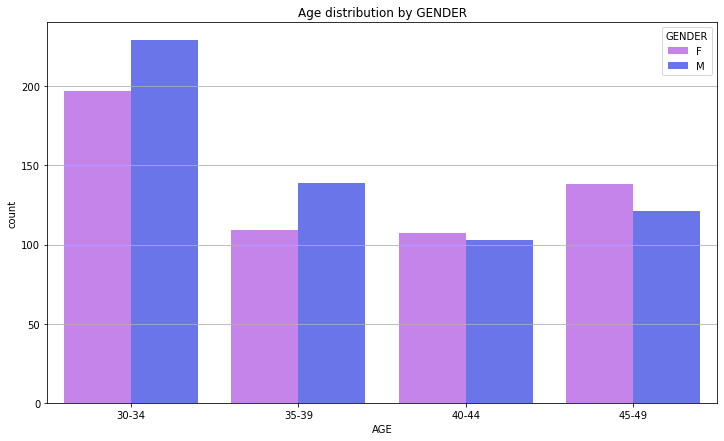

In [19]:
fig =plt.figure(figsize=(12,7))
sns.countplot(data=df_c, x='AGE', hue='GENDER',palette =['#C873FB','#5663FF'])
plt.title('Age distribution by GENDER')
plt.grid(axis = 'y')

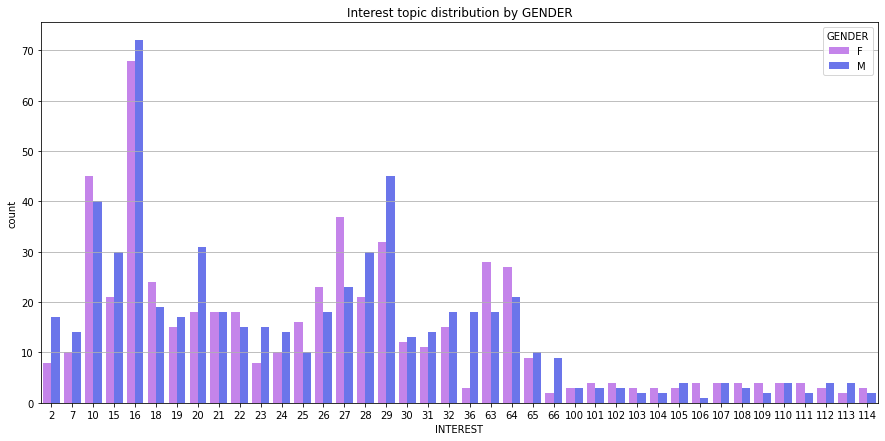

In [20]:
fig  =plt.figure(figsize=(15,7))
sns.countplot(data=df_c, x='INTEREST', hue ='GENDER', palette =['#C873FB','#5663FF'])
plt.title('Interest topic distribution by GENDER')
plt.grid(axis='y')

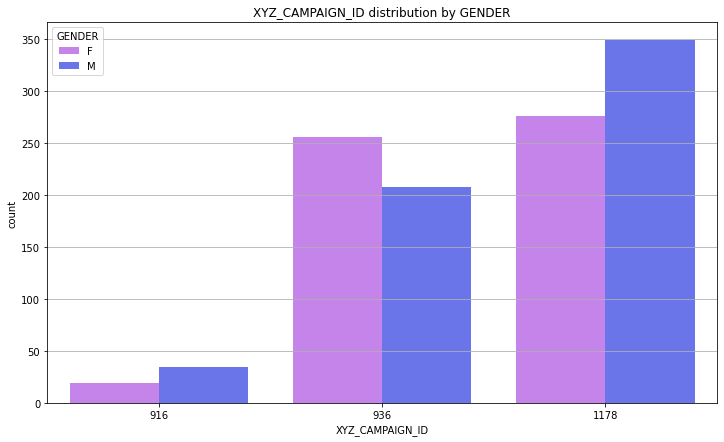

In [21]:
fig = plt.figure(figsize=(12,7))
sns.countplot(data =df_c, x ='XYZ_CAMPAIGN_ID', hue ='GENDER', palette=['#C873FB','#5663FF'])
plt.title('XYZ_CAMPAIGN_ID distribution by GENDER')
plt.grid(axis ='y')

correlation matrix

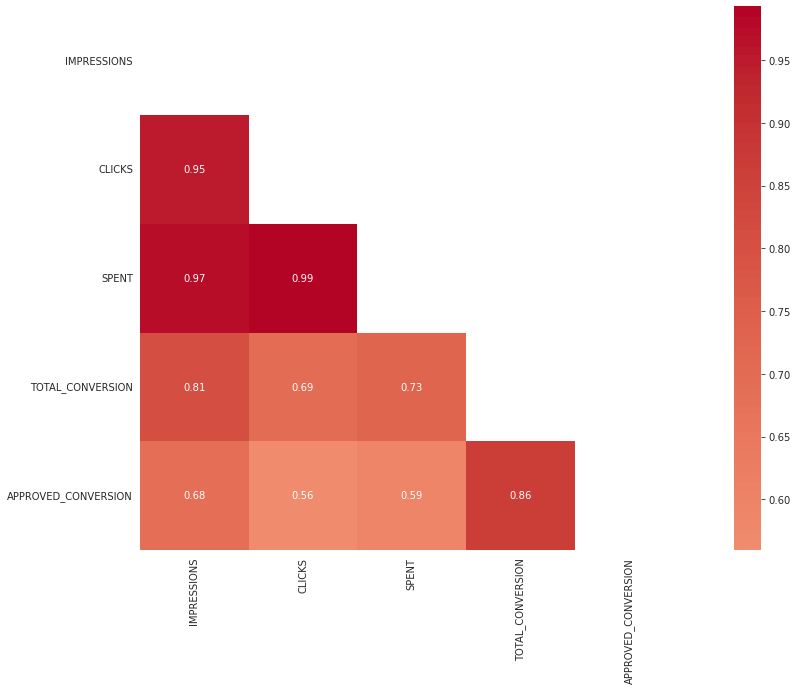

In [25]:
corr = df_c.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr, mask=mask, annot=True,cmap ='coolwarm', center =0, square =True)

Text(0.5, 0.95, 'Relathionships between numerical features')

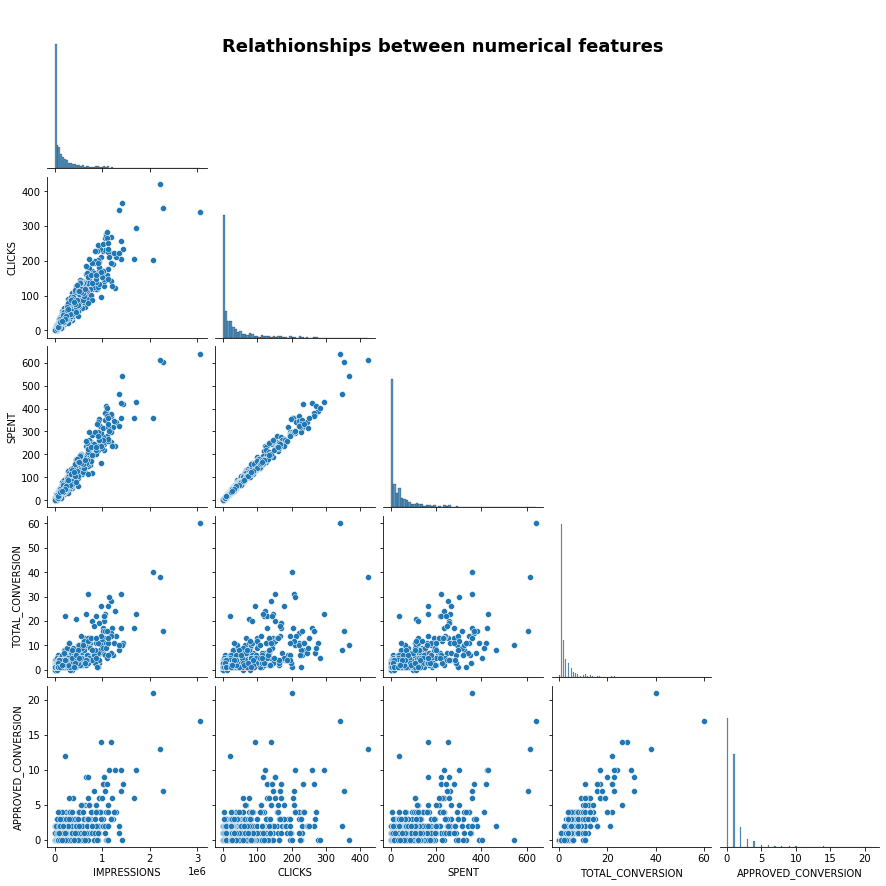

In [26]:
sns.pairplot(df_c, corner=True)
plt.suptitle("Relathionships between numerical features",x =0.5,y =0.95, size= 18, weight ='bold')

Text(0.5, 0.95, 'Relathionships between numerical features by GENDER')

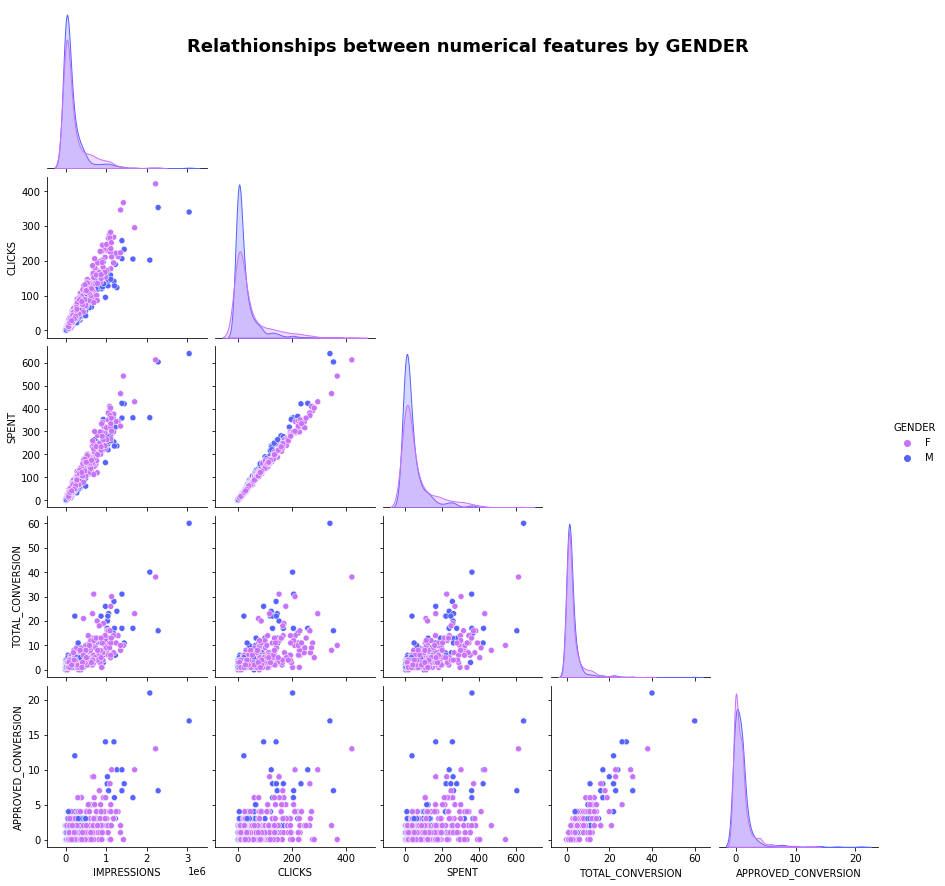

In [30]:
sns.pairplot(df_c, corner=True, hue ='GENDER',palette=['#C873FB','#5663FF'])
plt.suptitle("Relathionships between numerical features by GENDER",x=0.5, y=0.95, size=18, weight ='bold')

Text(0.5, 0.95, 'Relathionships between numerical features by AGE category')

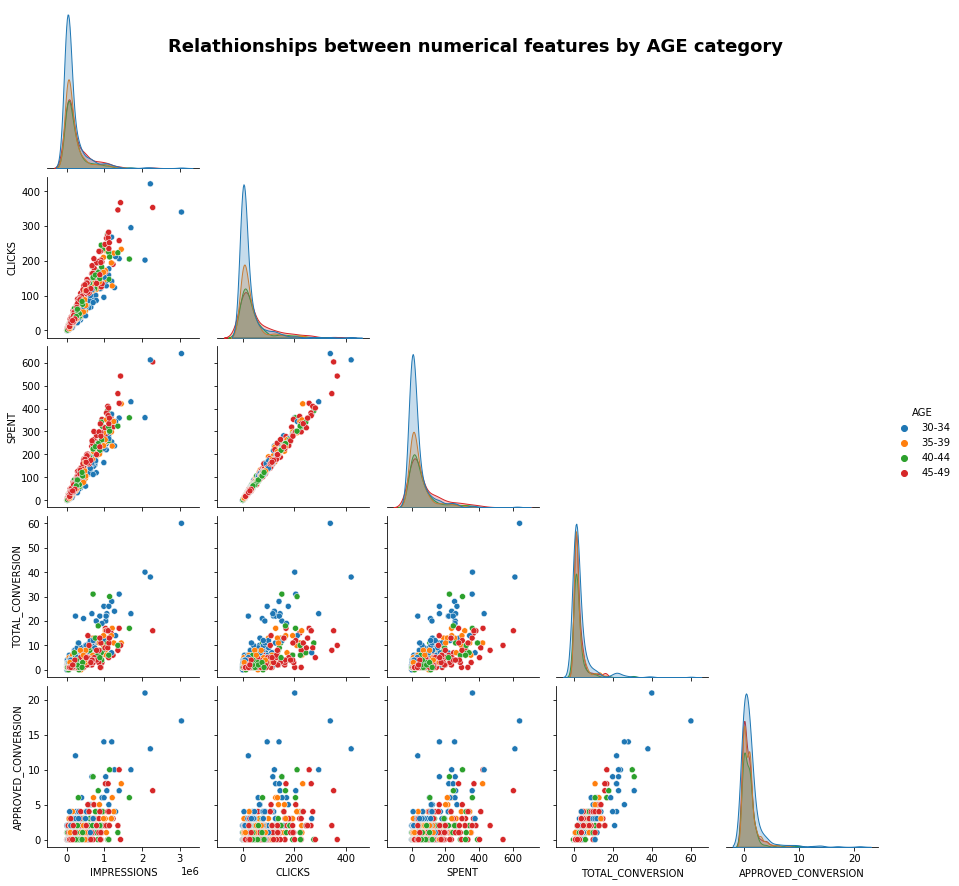

In [32]:
sns.pairplot(df_c, corner=True, hue ='AGE')
plt.suptitle("Relathionships between numerical features by AGE category", x= 0.5, y=0.95, size= 18, weight ='bold')